gradient descent -> theta =  [-3.87805118  1.1912525 ]
normal equation -> theta =  [-3.89578088  1.19303364]


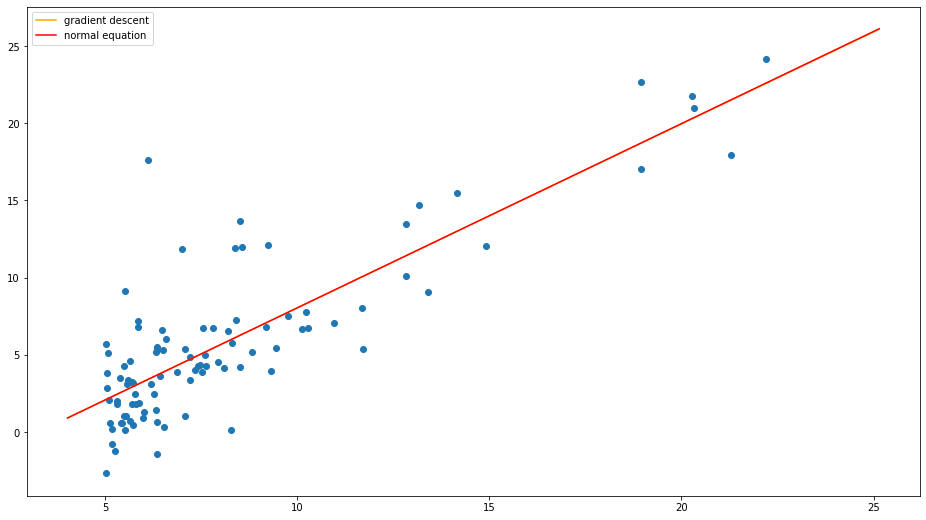

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ex1data1.txt', header=None)
dataset = df.to_numpy()

min_x = np.min(dataset[:, 0]) - 1
max_x = np.max(dataset[:, 1]) + 1
x_range = np.linspace(min_x, max_x, 20)

xx = np.c_[np.ones(len(dataset)), dataset[:, 0]] # shape=(m, 2)
yy = np.reshape(dataset[:, 1], (-1, 1))  # shape = (m, 1)

# calculate by normal equation 
def normal_equation(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y

# calculate theta by gradient descent
num_iterate = 3000
alpha = 0.01
theta = np.zeros((2, 1))

for i in range(num_iterate):
    y_hat = xx @ theta
    error = y_hat - yy
    d_J_d_theta = (xx.T @ error) / (len(xx))
    theta = theta - alpha * d_J_d_theta

theta = theta.flatten()
print('gradient descent -> theta = ', theta)
y_hat = theta[0] + theta[1] * x_range

# plot the dataset 
plt.figure(figsize=(16, 9))
plt.scatter(dataset[:, 0], dataset[:, 1])

# plot the prediction line (calculated by gradient descent)
plt.plot(x_range, y_hat, color='orange', label='gradient descent')

theta = normal_equation(xx, yy).flatten()
print('normal equation -> theta = ', theta)
y_hat = theta[0] + theta[1] * x_range

# plot the prediction line (calculated by normal equation)
plt.plot(x_range, y_hat, color='red', label='normal equation')

plt.legend()
# gradient descent -> theta =  [-3.87805118  1.1912525 ] (iteration 3000 times)
# normal equation -> theta =  [-3.89578088  1.19303364]
# the two linear lines are very close...